## TV Shows and Movies listed on Netflix

<!-- <div style="background-image:url( https://www.vshsolutions.com/wp-content/uploads/2020/02/recommender-system-for-movie-recommendation.jpg);background-size: cover;"> -->
    
<img src="https://images.pexels.com/photos/436413/pexels-photo-436413.jpeg?auto=compress&cs=tinysrgb&dpr=2&w=500"  style="width:1100px;height:400px;">

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

#### Inspiration
Some of the interesting questions (tasks) which can be performed on this dataset -

- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [193]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [194]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [196]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [197]:
df.shape

(7787, 12)

In [198]:
df_copy=df.copy()
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


After the above checks, we already found a few cleaning steps to do:

####  1.`Remove unnecessary columns`
   - show_id does not contain any relevant information and should be removed
   - type only has one unique value ("TV Shows") since we removed all movies. Therefore, this column does not contain any relevant information and should be removed
   
####  2.`Handling missing values`
 We have to think about how to handle the missing values in the columns director, cast, country, date_added, and rating
 
#### 3.`Correct data format`
`date_added` and `duration` are currently of the data type object and should be converted to a datetime type and numerical type respectively

#### 4.`Untangle merged columns`
Additionally, from the first look at the dataframe we can see that cast and listed_in have names and categories that can appear in mutliple data points. We should think about how to preprocess this for easier handling.


### Handling missing values
We have to think about how to handle the missing values in the columns director, cast, country, date_added, and rating.

- For director, cast, country, we can fill the missing values with `"Missing"` since these are categorical features.
- The amount of missing values in date_added is less, so we can drop those rows containing null values.
- The rating columns rating already has a categoriy "NR", which means "no rating". We will used this category to fill missing values.

In [199]:
#handle  missing values
df_copy['director'].fillna('Missing',inplace=True)
df_copy['cast'].fillna('Missing',inplace=True)
df_copy['country'].fillna('Missing',inplace=True)
df_copy['rating'].fillna('NR',inplace=True)

In [200]:
df_copy.dropna(subset=['date_added'],axis=0,inplace=True)


In [201]:
df_copy.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [202]:
df_copy['added_month'] = np.nan
df_copy['added_date'] = np.nan
df_copy['added_year'] = np.nan


for i in range(len(df_copy)):
    df_copy['added_month'][i] = df_copy.date_added.iloc[i].split(' ')[0]

for i in range(len(df_copy)):
    df_copy['added_date'][i] = df_copy.date_added.iloc[i].split(' ')[1][:-1]

for i in range(len(df_copy)):
    df_copy['added_year'][i] = df_copy.date_added.iloc[i].split(' ')[2]

In [203]:
df_copy.drop('date_added',axis=1,inplace=True)

In [204]:
df_copy.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,added_month,added_date,added_year
0,s1,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August,14.0,2020.0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,23.0,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,20.0,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,16.0,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,1.0,2020.0


In [205]:
for i in ['director','cast','country','description','listed_in']:
    df_copy[i] = df_copy[i].apply(lambda x:x.lower())

In [206]:
listed_in=[]
for i in range(len(df_copy)):
    listed_in.extend(df_copy.listed_in.iloc[i].split(','))

listed_dict={}
for i in listed_in:
    listed_dict[i]=listed_in.count(i)
    
listed_dict=sorted(listed_dict.items(), key=lambda item: item[1], reverse=True)
print(listed_dict)

[(' international movies', 2323), ('dramas', 1384), ('comedies', 1074), ('documentaries', 751), (' dramas', 722), ('action & adventure', 721), ('international tv shows', 689), (' independent movies', 653), (' tv dramas', 641), (' romantic movies', 528), (' international tv shows', 509), ('children & family movies', 502), (' thrillers', 442), (' tv comedies', 409), (' comedies', 397), ('crime tv shows', 369), ("kids' tv", 357), ('stand-up comedy', 321), (' romantic tv shows', 305), (' music & musicals', 304), ('horror movies', 244), ('british tv shows', 231), (' sci-fi & fantasy', 207), (' sports movies', 195), ('docuseries', 193), (' docuseries', 159), (' korean tv shows', 150), ('anime series', 147), (' spanish-language tv shows', 144), (' reality tv', 120), ('international movies', 114), (' tv action & adventure', 113), ('tv comedies', 109), ('reality tv', 102), (' tv mysteries', 90), (' lgbtq movies', 89), (' science & nature tv', 85), ('classic movies', 77), (' tv sci-fi & fantasy'

In [207]:
listed_dic=dict(listed_dict)

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

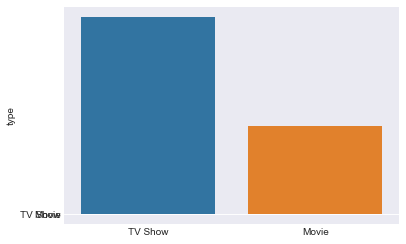

In [221]:
plt.barh(df_copy.type.unique(), df_copy.type.value_counts())

# Show graphic
sns.barplot(df_copy.type.unique(), df_copy.type.value_counts())
ax.set_title('Most Uploaded Content',fontsize=20, fontweight='bold') 
plt.show()

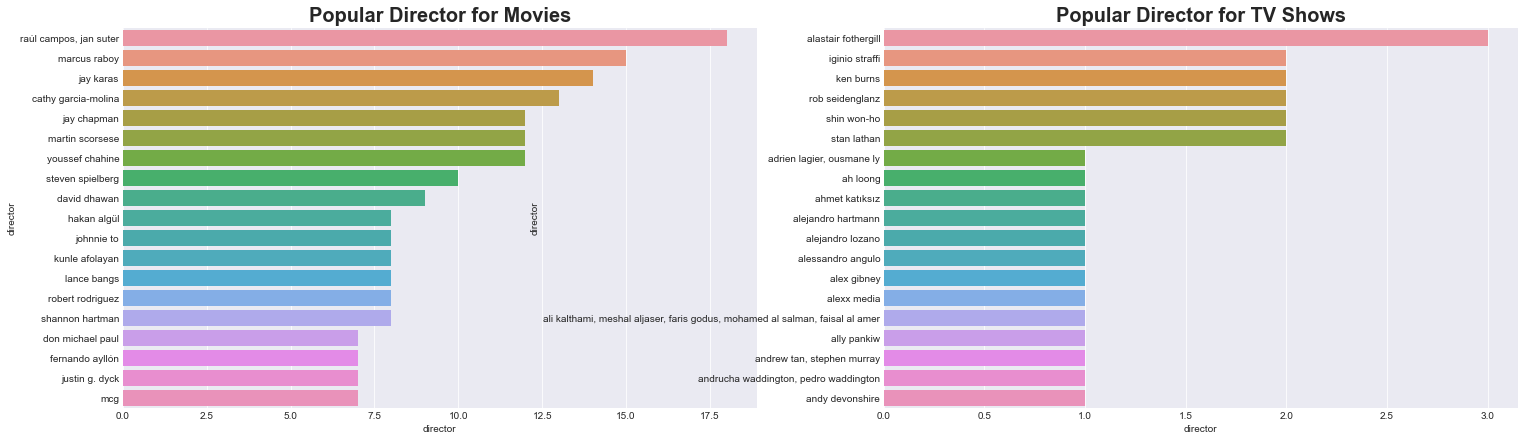

In [209]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,7))

data = df_copy.groupby('type')['director'].value_counts()['Movie'][1:20]
data = pd.DataFrame(data)

sns.barplot(data.director,data.index, ax=ax[0])

ax[0].set_title('Popular Director for Movies',fontsize=20, fontweight='bold') 

data = df_copy.groupby('type')['director'].value_counts()['TV Show'][1:20]
data = pd.DataFrame(data)

sns.barplot( data.director,data.index,ax=ax[1])

ax[1].set_title('Popular Director for TV Shows',fontsize=20, fontweight='bold') 

# Show graphic
plt.show()

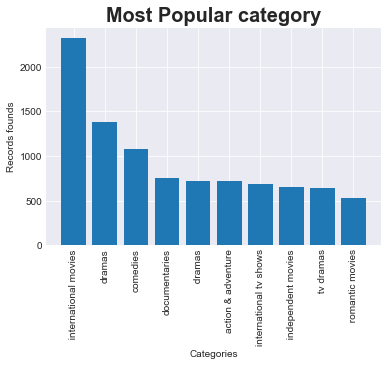

In [210]:
height = list(listed_dic.values())[:10]

bars = list(listed_dic.keys())[:10]
y_pos = np.arange(len(bars))

# Create Graph
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

#x-axis labels 
plt.xlabel('Categories') 

# Rotate labels
plt.xticks(rotation=90)

#y-axis labels 
plt.ylabel('Records founds') 

#plot title 
plt.title('Most Popular category',fontsize=20, fontweight='bold') 

# Show graphic
plt.show()

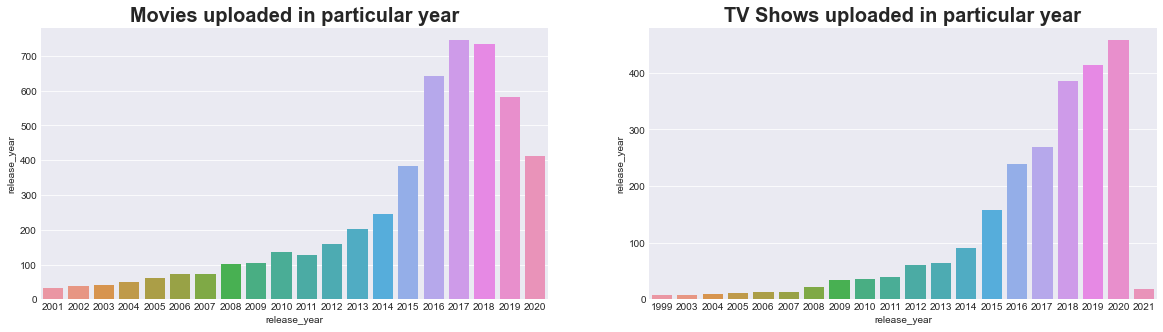

In [211]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
movie = df_copy.groupby('type')['release_year'].value_counts()['Movie']

movie= pd.DataFrame(movie.sort_values(ascending=False)[:20])

sns.barplot(movie.index, movie.release_year,ax=ax[0] )

ax[0].set_title('Movies uploaded in particular year',fontsize=20, fontweight='bold') 


TV = df_copy.groupby('type')['release_year'].value_counts()['TV Show']

TV = pd.DataFrame(TV.sort_values(ascending=False)[:20])

sns.barplot(TV.index, TV.release_year, ax=ax[1])

ax[1].set_title('TV Shows uploaded in particular year' ,fontsize=20, fontweight='bold') 

plt.show()

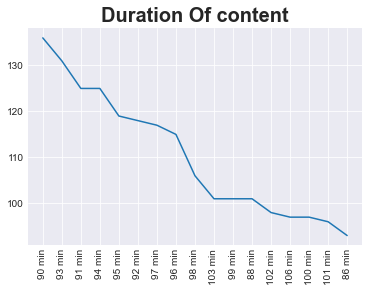

In [212]:
plt.plot(df_copy.duration.value_counts().index.to_list()[3: 20], df_copy.duration.value_counts()[3:20])
plt.xticks(rotation='90')
plt.title('Duration Of content', fontsize=20, fontweight='bold')
plt.show()

### Recommendation System (Content Based)

<img src="https://www.researchgate.net/profile/Lionel-Ngoupeyou-Tondji/publication/323726564/figure/fig5/AS:631605009846299@1527597777415/Content-based-filtering-vs-Collaborative-filtering-Source.png"  style="width:500px;height:300px;">

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [214]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df_copy['description'] = df_copy['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df_copy['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7777, 17893)

In [215]:
# Import linear_kernel
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the cosine similarity matrix
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [216]:
indices = pd.Series(df_copy.index, index=df_copy['title']).drop_duplicates()

In [217]:
def get_recommendations(title, sig=sig):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies based on the similarity scores
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Return the top 10 most similar movies
    return df_copy['title'].iloc[movie_indices]

In [218]:
get_recommendations('Peaky Blinders')

3003                                 Initial D
5863    Sturgill Simpson Presents Sound & Fury
7270                                     Turbo
3052                               Irada Pakka
7456                                    Wadjda
6778          The Prince Who Turns into a Frog
5210                               Rimba Racer
870                        Beyblade Burst Rise
1674                Death Race: Beyond Anarchy
7370          Uppity: The Willy T. Ribbs Story
Name: title, dtype: object

In [219]:
get_recommendations('Stoked')

1550       Cuddle Weather
5403          Satrangi Re
1700              Demonic
2470      Golmaal Returns
1788                  DNA
2117      Fary : Hexagone
6797    The Rachel Divide
1640       Dawson's Creek
1992       Emma' (Mother)
7122              Toc Toc
Name: title, dtype: object